#**Sentiment Analysis**

## Preparations

**note:**<br>
 make sure that you use an GPU for that operation.
To train the model will take several time and with a GPU you can fasten that task. 

In [ ]:
# Note: after installing simpletransformers, one must restart the runtime

!pip install simpletransformers

Download Dataset from stanford.edu



In [ ]:
import os

# Create 'data' folder
os.mkdir('/content/data')

In [ ]:
# Change current directory
os.chdir('/content/data')

In [ ]:
# Download dataset
!curl -O --location https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  11.4M      0  0:00:07  0:00:07 --:--:-- 17.6M


In [ ]:
 # Unpack dataset
 
!tar -xf aclImdb_v1.tar.gz

In [ ]:
# Get back to default ('content/') location
os.chdir('..')

## Load data set

We import all necessary libraries. Among the simpletransformers library,
we also need functions from scikit-learn (Pedregosa et al., 2011) and the Pandas
library (Reback et al., 2020) to load and extract our training text corpus from the
JSON file.
In google-colab, pandas and scikit-learn are pre-installed.
We extract our training text corpus and import it into a Pandas data frame df (line
7).

In [ ]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [ ]:
# Function to adda all singel text-file contents into one list

def get_appendedData(file_folder):
  data, labels = [], []

  for label in ('neg', 'pos'):
    folder_name = os.path.join(file_folder, label)
    
    for file in os.listdir(folder_name):
      with open(os.path.join(folder_name, file), 'rb') as f:

        review = f.read().decode('utf-8').replace('\n', '')
        data.append(review)
        labels.append(1 if label == 'pos'else 0)

  return data, labels

In [ ]:
train_folder = '/content/data/aclImdb/train'
test_folder = '/content/data/aclImdb/test'

train_data = get_appendedData(train_folder)
test_data = get_appendedData(test_folder)

In [ ]:
train_df = pd.DataFrame(train_data).transpose()
train_df.columns = ['review', 'label']

test_df = pd.DataFrame(test_data).transpose()
test_df.columns = ['review', 'label']

Look at some of the dataset entries:

In [ ]:
train_df.head(3)

,review,label
0,This was one of the worst Wrestlemania's I've ...,0
1,I fell asleep on my couch at 7:35pm last night...,0
2,This early John Wayne Lone Star western has a ...,0


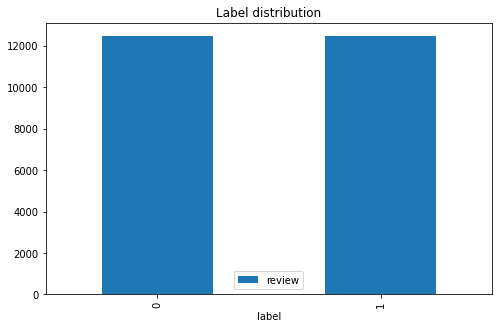

In [ ]:
# Display label distribution
from matplotlib import pyplot as plt

ax = train_df.groupby("label").count().plot(kind="bar", 
                                                 figsize=(8, 5),
                                                 title="Label distribution")
plt.show()

## Data Preparation

The text files contain HTML-tags which must be removed to improve the classification performance.
According to the example from [stackoverflow_9662346](https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string) a regualar expression is used to remove the HTML tags.

In [ ]:
import re

cleanthml_re = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

def cleanhtml(raw_html):
  cleantext = re.sub(cleanthml_re, '', raw_html)
  return cleantext

cleanbrackets_re = re.compile('\[[^]]*\]')
def cleanbrackets(raw_text):
  cleantext = re.sub(cleanbrackets_re,'', raw_text)
  return cleantext

cleanspecchar_re = re.compile(r'[^a-zA-z0-9\s]')
def cleanspecchar(raw_text):
  cleantext = re.sub(cleanspecchar_re, '', raw_text)
  return cleantext

In [ ]:
# Remove HTML tags in training data

train_df['review'] = train_df['review'].apply(cleanhtml)

In [ ]:
# Remove brackets in training data

train_df['review'] = train_df['review'].apply(cleanbrackets)

In [ ]:
# Remove special characters in training data

train_df['review'] = train_df['review'].apply(cleanspecchar)

## Create classification model

We create our classification model. We use a model
bert_base_uncased (uncased monolingual English version of BERT published by
Google) from the “bert” model family. The number of labels (categories) is set to 2 as we want to differ good and bad reviews.

In [ ]:
# Create a classification model
model = ClassificationModel('bert', 'bert-base-uncased', num_labels=2)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

## Train model

We can start training our model. This automatically downloads the pre-trained
BERT model, initializes its parameters, and preprocesses our training data using a
subword tokenizer before the actual training process is started.

In [ ]:
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/25000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/3125 [00:00<?, ?it/s]

(3125, 0.33548843814842405)

## Evaluation

We evaluate the model on our evaluation set.

In [ ]:
# Evaluate the model
result, model_outputs, predictions = model.eval_model(test_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/25000 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/3125 [00:00<?, ?it/s]

In [ ]:
print(result)

{'mcc': 0.7630721318789038, 'tp': 11319, 'tn': 10708, 'fp': 1792, 'fn': 1181, 'auroc': 0.9532182432, 'auprc': 0.9506820379572944, 'eval_loss': 0.3345427808865905}
